In [3]:
import pandas as pd
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score

In [4]:
#path = "/home/jalex/Downloads"
path = "/Users/AndrewO/Documents/HeriotWatt/PycharmProjects/dataminingcw1"
col_name = ['class']
features = pd.read_csv(
    filepath_or_buffer='{path}/x_train_gr_smpl.csv'.format(path=path),
    sep=',', na_values='None', decimal='.')

classes = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl.csv'.format(path=path),
    sep=',', na_values='None', decimal='.')

y_0 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_0.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_1 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_1.csv'.format(path=path),
    sep=',', na_values='None', decimal='.', names = col_name)

y_2 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_2.csv'.format(path=path),
    sep=',', na_values='None', decimal='.', names = col_name)

y_3 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_3.csv'.format(path=path),
    sep=',', na_values='None', decimal='.', names = col_name)

y_4 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_4.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_5 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_5.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_6 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_6.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_7 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_7.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_8 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_8.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)

y_9 = pd.read_csv(
    filepath_or_buffer='{path}/y_train_smpl_9.csv'.format(path=path),
    sep=',', na_values='None', decimal='.' , names = col_name)



In [3]:
classes = classes.rename({'0': 'class'}, axis='columns')
roadsigns = pd.concat([features, classes], axis = 1)
#roadsigns = sk.utils.shuffle(roadsigns)
classes_train = []
classes_train.append(pd.concat([features, y_0], axis = 1))
classes_train.append(pd.concat([features, y_1], axis = 1))
classes_train.append(pd.concat([features, y_2], axis = 1))
classes_train.append(pd.concat([features, y_3], axis = 1))
classes_train.append(pd.concat([features, y_4], axis = 1))
classes_train.append(pd.concat([features, y_5], axis = 1))
classes_train.append(pd.concat([features, y_6], axis = 1))
classes_train.append(pd.concat([features, y_7], axis = 1))
classes_train.append(pd.concat([features, y_8], axis = 1))
classes_train.append(pd.concat([features, y_9], axis = 1))

 
def getInstancesFromClass(classAttribute):
    a = roadsigns.loc[roadsigns['class'] == classAttribute]
    return a.drop(['class'], axis = 1)

def allInstancesToMatrix(instances):
    matrices = []
    if len(instances) == 1:
        matrices = (instances.iloc[[0]]).values.reshape(48,48)
    else:
        for i in range(len(instances)):
            matrices.append((instances.iloc[[i]]).values.reshape(48,48))
    return matrices

In [4]:
signs0 = getInstancesFromClass(0)

#rounding intensity values
base = 7
rounded_signs0 = signs0.applymap(lambda x: base * round(float(x)/base))

In [5]:
#converting the instances from row to matrix form so they can be plotted
signs0 = allInstancesToMatrix(signs0)

In [7]:
# Calculating correlation per class
top_attributes = []
for class_train in classes_train:
    top_attributes.append(class_train.corr())   

In [8]:
top2 = []
for a in top_attributes:
    x = a.abs().nlargest(3, 'class').index.values
    top2.append(np.delete(x, 0)) 
top2 = np.concatenate(top2, axis = 0)

In [9]:
top10 = []
for a in top_attributes:
    x = a.abs().nlargest(11, 'class').index.values
    top10.append(np.delete(x, 0)) 
    
top10 = np.concatenate(top10, axis = 0)

In [10]:
top50 = []
for a in top_attributes:
    x = a.abs().nlargest(51, 'class').index.values
    top50.append(np.delete(x, 0)) 
    
top50 = np.concatenate(top50, axis = 0)

In [2]:
all_top2 = pd.DataFrame() 
for i in range(10):
    a = roadsigns.loc[roadsigns['class'] == i]
    b = top2.tolist()
    data = a[b].values.tolist()
    all_top2 = all_top2.append(data, ignore_index = True)
    
all_top10 = pd.DataFrame() 
for i in range(10):
    a = roadsigns.loc[roadsigns['class'] == i]
    b = top10.tolist()
    data = a[b].values.tolist()
    all_top10 = all_top10.append(data, ignore_index = True)
    
all_top50 = pd.DataFrame() 
for i in range(10):
    a = roadsigns.loc[roadsigns['class'] == i]
    b = top50.tolist()
    data = a[b].values.tolist()
    all_top50 = all_top50.append(data, ignore_index = True)

NameError: name 'pd' is not defined

In [12]:
all_top2['class'] = classes
all_top10['class'] = classes
all_top50['class'] = classes

all_top2 = sk.utils.shuffle(all_top2)
all_top10 = sk.utils.shuffle(all_top10)
all_top50 = sk.utils.shuffle(all_top50)

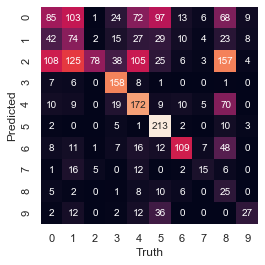

0.38148443735035914


In [13]:
msk = np.random.rand(len(all_top2)) < 0.8
train_x = all_top2[msk]
test_x = all_top2[~msk]
train_y = train_x.loc[:, 'class']
train_x = train_x.drop(['class'], axis=1)
test_y = test_x.loc[:, 'class']
test_x = test_x.drop(['class'], axis=1)
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(train_x, train_y)

# Predict Output 
pred = model.predict(test_x)

# Plot Confusion Matrix
mat = confusion_matrix(pred, test_y)
names = np.unique(pred)
ax = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show(block=True)
print(accuracy_score(test_y,pred))

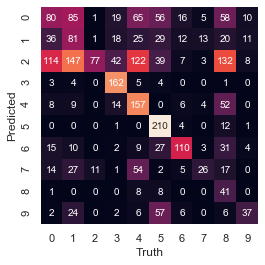

0.38395303326810176


In [20]:
msk = np.random.rand(len(all_top10)) < 0.8
train_x = all_top10[msk]
test_x = all_top10[~msk]
train_y = train_x.loc[:, 'class']
train_x = train_x.drop(['class'], axis=1)
test_y = test_x.loc[:, 'class']
test_x = test_x.drop(['class'], axis=1)
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(train_x, train_y)

# Predict Output 
pred = model.predict(test_x)

# Plot Confusion Matrix
mat = confusion_matrix(pred, test_y)
names = np.unique(pred)
ax = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show(block=True)
print(accuracy_score(test_y,pred))

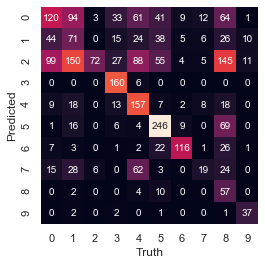

0.4163378058405683


In [29]:
msk = np.random.rand(len(all_top50)) < 0.8
train_x = all_top50[msk]
test_x = all_top50[~msk]
train_y = train_x.loc[:, 'class']
train_x = train_x.drop(['class'], axis=1)
test_y = test_x.loc[:, 'class']
test_x = test_x.drop(['class'], axis=1)
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(train_x, train_y)

# Predict Output 
pred = model.predict(test_x)

# Plot Confusion Matrix
mat = confusion_matrix(pred, test_y)
names = np.unique(pred)
ax = sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show(block=True)
print(accuracy_score(test_y,pred))

NameError: name 'all_top2' is not defined

Text(89.18, 0.5, 'Predicted')

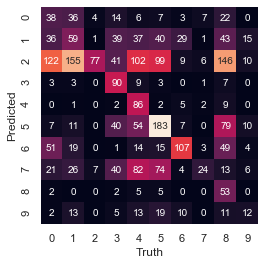

In [8]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(train_x, train_y)

# Predict Output 
pred = model.predict(test_x)

# Plot Confusion Matrix
mat = confusion_matrix(pred, test_y)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')